<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/ViviendaBasicoMio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:

# gestión de datos
import numpy as np
import pandas as pd

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler

# modelos
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# quitar alertas
import warnings
warnings.filterwarnings("ignore")

In [36]:

#Conexion
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#leemos el fichero IMDB
Viviendas=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejercicios/1.viviendas_basico.csv")
# Cargar archivo CSV como DataFrame ver los 5 primero registros
Viviendas.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id_vivienda,superficie,num_hab,distancia,fecha_const,parking,precio,vendida
0,viv_1,65.0,1,7,1991-01-01,ext,166000,1.0
1,viv_2,97.0,4,8,1994-01-01,ext,279000,1.0
2,viv_3,80.0,4,4,1970-01-01,sin,233000,1.0
3,viv_4,73.0,1,1,1983-01-01,ext,182000,1.0
4,viv_5,86.0,2,8,1999-01-01,sin,210000,1.0
5,viv_6,95.0,3,1,1978-01-01,int,297000,1.0
6,viv_7,110.0,4,1,1978-01-01,ext,225000,0.0
7,viv_8,126.0,1,1,1997-01-01,ext,222000,0.0
8,viv_9,98.0,2,8,2002-01-01,sin,225000,1.0
9,viv_10,65.0,4,5,1976-01-01,sin,207000,1.0


o	Se obtiene información básica sobre las columnas del DataFrame (tipos de datos, valores no nulos, etc.).

df.describe(): Proporciona estadísticas descriptivas de las columnas numéricas.

df.head(n): Muestra las primeras n filas del DataFrame.

df.tail(n): Muestra las últimas n filas del DataFrame.

df.isnull().sum(): Muestra el número de valores nulos por columna.

df.dtypes: Muestra los tipos de datos de cada columna.

In [37]:
Viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_vivienda  7000 non-null   object 
 1   superficie   6990 non-null   float64
 2   num_hab      7000 non-null   int64  
 3   distancia    7000 non-null   int64  
 4   fecha_const  7000 non-null   object 
 5   parking      7000 non-null   object 
 6   precio       7000 non-null   int64  
 7   vendida      7000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 437.6+ KB


In [38]:
Viviendas.isnull().sum()

,0
id_vivienda,0
superficie,10
num_hab,0
distancia,0
fecha_const,0
parking,0
precio,0
vendida,0


In [39]:
Viviendas.dtypes

,0
id_vivienda,object
superficie,float64
num_hab,int64
distancia,int64
fecha_const,object
parking,object
precio,int64
vendida,float64


# **Comprensión del Problema de Negocio:**

Se plantea el problema: el cliente quiere saber qué viviendas de las que no se han vendido, tienen más probabilidad de ser vendidas

**Predicción**: Predecir qué viviendas no vendidas tienen más probabilidades de ser vendidas.

**Priorización**: Ayudar a la inmobiliaria a priorizar sus esfuerzos de venta en las propiedades más prometedoras.

**Toma de Decisiones**: Facilitar la toma de decisiones informadas basadas en datos, en lugar de intuiciones.

**Eficiencia**: Optimizar los recursos y reducir el riesgo al enfocar la venta en las propiedades con mayor probabilidad de éxito.



Se comprende que es necesario entrenar un modelo de clasificación que aprenda a
distinguir las viviendas que se venden de las que no se venden

In [40]:
ViviendasCopia = Viviendas.copy()

In [41]:
#id_vivienda: Eliminar.
del ViviendasCopia['id_vivienda']
#parking: One-hot encoding.
ViviendasCopia = pd.get_dummies(ViviendasCopia, columns=['parking'])

#fecha_const: Extraer el año.
# Primero, convertir la columna a tipo fecha
ViviendasCopia['fecha_const'] = pd.to_datetime(ViviendasCopia['fecha_const'])
# Luego, extraer el año
ViviendasCopia['año'] = ViviendasCopia['fecha_const'].dt.year

In [42]:
media_superficie = ViviendasCopia['superficie'].mean()
print(media_superficie)
#Completar la edad con 29 años, los valores nan
ViviendasCopia['superficie'] = ViviendasCopia['superficie'].fillna(96)

96.26666666666667


Elimina la columna fecha_const.

In [43]:
del ViviendasCopia['fecha_const']

Define tus variables X e y.

In [44]:
ViviendasCopia.head(5)

,superficie,num_hab,distancia,precio,vendida,parking_ext,parking_int,parking_sin,año
0,65.0,1,7,166000,1.0,True,False,False,1991
1,97.0,4,8,279000,1.0,True,False,False,1994
2,80.0,4,4,233000,1.0,False,False,True,1970
3,73.0,1,1,182000,1.0,True,False,False,1983
4,86.0,2,8,210000,1.0,False,False,True,1999


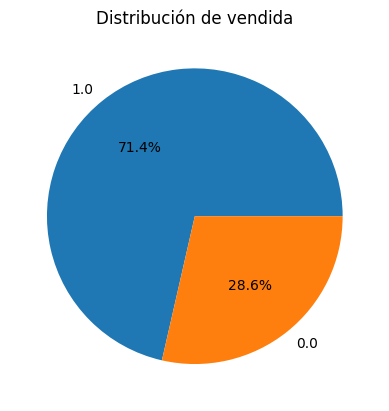

In [45]:
target = 'vendida'

# Calcula la frecuencia de cada valor de la variable target
counts = ViviendasCopia[target].value_counts()

# Crea el gráfico de pastel
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')

# Añade título al gráfico
plt.title(f'Distribución de {target}')

# Muestra el gráfico
plt.show()

Escala las features.

Selecciona el algoritmo y entrena el modelo

Seleccionar el Algoritmo de Clasificación:

Existen varios algoritmos de clasificación que puedes utilizar. Algunos ejemplos son:

Regresión Logística

Árboles de Decisión

Random Forest

Gradient Boosting Machines (como XGBoost, LightGBM)

Support Vector Machines

Redes Neuronales

In [47]:
target = 'vendida'
# Agrupamos las columnas q creemos mas importante para nuestro analisis
features = ['precio', 'num_hab', 'superficie'] # Añade o quita columnas según tu análisis

y = ViviendasCopia[target]
X = ViviendasCopia[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # 80% para entrenamiento, 20% para prueba

modelo = LogisticRegression()  # Define el modelo

modelo.fit(X_train, y_train) # Entrena el modelo (si no deseas hacer split modelo.fit(X_scaled, y))

LogisticRegression()